In [3]:
import sys
import os

project_path = r"C:\Users\jjmcc\OneDrive\Documents\Thesis Interim\ITGC-interim"
sys.path.append(project_path)

print("Project path added.")



Project path added.


In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

from alternative_image_clustering.data.mri_dataset import MRIDataset

# Path to raw dataset
RAW_DATA_DIR = r"E:\Testing"

# Load dataset
ds = MRIDataset(RAW_DATA_DIR)
print("Patients loaded:", len(ds))

Patients loaded: 136


In [5]:
def get_ed_es_times(mask):
    mask_np = mask.numpy()
    label_times = []

    for t in range(mask_np.shape[3]):
        if mask_np[..., t].sum() > 0:
            label_times.append(t)

    if len(label_times) < 2:
        return 0, mask_np.shape[3] - 1  # fallback
    
    return label_times[0], label_times[-1]


In [6]:
def normalize(image):
    """Normalize MRI intensities to 0–255."""
    img = image.astype(np.float32)
    img = img - img.min()
    img = img / (img.max() + 1e-8)
    img = (img * 255).astype(np.uint8)
    return img

def resize_slice(img, size=256):
    """Resize with CV2 to square."""
    return cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)


In [11]:
OUTPUT_DIR = r"E:\ProcessedMRI"
os.makedirs(OUTPUT_DIR, exist_ok=True)



In [12]:
for i in range(len(ds)):
    image, mask, path = ds[i]
    
    patient_id = os.path.basename(os.path.dirname(path))
    patient_out = os.path.join(OUTPUT_DIR, patient_id)
    os.makedirs(patient_out, exist_ok=True)

    # Convert to numpy
    img = image.numpy()
    mask_np = mask.numpy()

    # Find ED & ES
    ed, es = get_ed_es_times(mask)
    
    # Loop through slices
    num_slices = img.shape[2]
    for s in range(num_slices):

        # Extract ED slice
        slice_ed = img[:, :, s, ed]
        slice_es = img[:, :, s, es]

        # Preprocess
        slice_ed = resize_slice(normalize(slice_ed))
        slice_es = resize_slice(normalize(slice_es))

        # Save
        cv2.imwrite(os.path.join(patient_out, f"slice_{s:02d}_ED.png"), slice_ed)
        cv2.imwrite(os.path.join(patient_out, f"slice_{s:02d}_ES.png"), slice_es)

    print(f"Processed {patient_id}")


Processed G8K0M3
Processed H8K2K7
Processed G7S6V0
Processed R8V0Y4
Processed C0L7V1
Processed J6K4V3
Processed A7E4J0
Processed E3L8U8
Processed L6T2T5
Processed P3P9S5
Processed G1J5K3
Processed E4H7L4
Processed B2L0L2
Processed M6V2Y0
Processed O9V8W5
Processed B9H8N8
Processed L8N7P0
Processed R6V5W3
Processed F0K4T6
Processed I0I2J8
Processed K7L2Y6
Processed J4J8Q3
Processed K6N4N7
Processed E5S7W7
Processed M6M9N1
Processed B8P5Q9
Processed K3P3Y6
Processed D9F5P1
Processed B3E2W8
Processed B4S1Y2
Processed B5L5Y4
Processed A3P9V7
Processed L7Y7Z2
Processed E3F5U2
Processed E9V9Z2
Processed C7L8Z8
Processed G4I7V2
Processed A9L7Y7
Processed M2P5T8
Processed E0J2Z9
Processed G1K1V3
Processed D9I8O7
Processed L8N7Z0
Processed L2V5Z0
Processed I2J6Z6
Processed B7F5P0
Processed Q1Q3T1
Processed P3R6Y5
Processed B0L3Y2
Processed A6A8H0
Processed I8N8Y1
Processed L5U7Y4
Processed N9P5Z0
Processed C7M6W0
Processed T2Z1Z9
Processed E4I9O7
Processed D6E9U8
Processed B1G9J3
Processed I6P4

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

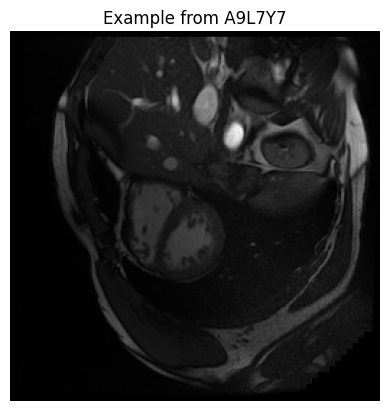

In [13]:
import random

# Choose a random patient folder
patient = random.choice(os.listdir(OUTPUT_DIR))
folder = os.path.join(OUTPUT_DIR, patient)

# Load random slice
files = sorted(os.listdir(folder))
example = cv2.imread(os.path.join(folder, random.choice(files)), cv2.IMREAD_GRAYSCALE)

plt.imshow(example, cmap="gray")
plt.title(f"Example from {patient}")
plt.axis("off")
